## [Covid-19 detection  using Convolutional Neural Network](https://)


In [ ]:
#import all the required packages
import os
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#create a variable indicating the path of the current image directory
data_path = '/content/drive/My Drive/transferlearning'


In [ ]:
# All the necessary intializations to read data from directories
classes = os.listdir(data_path) # returns sub-directory names from the given path, typically these are the folders where your data is residing
Images = [] #you will be adding your image pixels to this list 
labels = [] #you will be adding your image labels to this list

In [ ]:
#Reading all the images of the dataset along with their associted labels 
for class_name in classes:
    subpath=data_path+"/"+class_name 
    for im in os.listdir(subpath):  
        im_path = subpath+"/"+im  
        print(im_path)
        img = cv2.imread(im_path)
        img = cv2.resize(img,(128,128))
        Images.append(img)
        label = classes.index(class_name)
        labels.append(label)
        #print(im,'-->',img.shape,'--->',label)
        
X = np.asarray(Images)  #images  as a numpy array
y = np.asarray(labels)  #labels as a numpy array 

/content/drive/My Drive/transferlearning/No_findings/00002457_011.png
/content/drive/My Drive/transferlearning/No_findings/00002094_002.png
/content/drive/My Drive/transferlearning/No_findings/00001385_000.png
/content/drive/My Drive/transferlearning/No_findings/00002659_001.png
/content/drive/My Drive/transferlearning/No_findings/00003361_008.png
/content/drive/My Drive/transferlearning/No_findings/00003005_019.png
/content/drive/My Drive/transferlearning/No_findings/00001865_000.png
/content/drive/My Drive/transferlearning/No_findings/00003264_004.png
/content/drive/My Drive/transferlearning/No_findings/00002549_003.png
/content/drive/My Drive/transferlearning/No_findings/00001803_017.png
/content/drive/My Drive/transferlearning/No_findings/00003140_008.png
/content/drive/My Drive/transferlearning/No_findings/00001680_000.png
/content/drive/My Drive/transferlearning/No_findings/00001996_010.png
/content/drive/My Drive/transferlearning/No_findings/00001684_005.png
/content/drive/My Dr

In [ ]:
X.shape

(625, 128, 128, 3)

In [ ]:
y.shape

(625,)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

ValueError: ignored

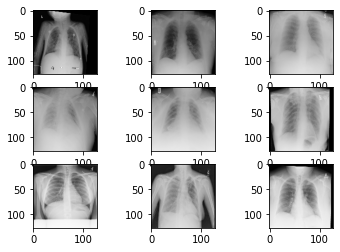

In [ ]:
#Visualizing few sample images from the dataset
from matplotlib import pyplot

# plot first few images from data
for i in range(42):
    # define subplot
    pyplot.subplot(331+ i)
    # plot raw pixel data
    pyplot.imshow(X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
#split the data into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(437, 128, 128, 3)

In [ ]:
X_test.shape

(188, 128, 128, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Dense

# **Implementing a CNN Model**
# **Without Dropout & BatchNormalization**

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)      

In [ ]:
model.fit(X_train,y_train,batch_size=8,epochs=10,validation_split=0.1)

Epoch 1/10
57/57 [==============================] - 1s 11ms/step - loss: 1.3009 - accuracy: 0.7644 - val_loss: 0.2844 - val_accuracy: 0.9200
Epoch 2/10
57/57 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.9000 - val_loss: 0.3524 - val_accuracy: 0.8000
Epoch 3/10
57/57 [==============================] - 0s 5ms/step - loss: 0.2265 - accuracy: 0.8911 - val_loss: 0.2397 - val_accuracy: 0.8800
Epoch 4/10
57/57 [==============================] - 0s 5ms/step - loss: 0.1694 - accuracy: 0.9333 - val_loss: 0.1832 - val_accuracy: 0.9000
Epoch 5/10
57/57 [==============================] - 0s 5ms/step - loss: 0.1251 - accuracy: 0.9444 - val_loss: 0.1500 - val_accuracy: 0.9400
Epoch 6/10
57/57 [==============================] - 0s 5ms/step - loss: 0.1407 - accuracy: 0.9467 - val_loss: 0.1585 - val_accuracy: 0.9400
Epoch 7/10
57/57 [==============================] - 0s 5ms/step - loss: 0.1540 - accuracy: 0.9422 - val_loss: 0.1056 - val_accuracy: 0.9600
Epoch 8/10
57/57 [=

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

4/4 [==============================] - 0s 13ms/step - loss: 0.1699 - accuracy: 0.9280
Accuracy: 92.80%


**CNN With Dropout & BatchNormalization**

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=8,epochs=10,validation_split=0.1)

Epoch 1/10
57/57 [==============================] - 0s 8ms/step - loss: 0.2720 - accuracy: 0.8911 - val_loss: 0.4486 - val_accuracy: 0.7600
Epoch 2/10
57/57 [==============================] - 0s 5ms/step - loss: 0.1188 - accuracy: 0.9622 - val_loss: 0.2388 - val_accuracy: 0.8600
Epoch 3/10
57/57 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.9689 - val_loss: 0.4509 - val_accuracy: 0.8600
Epoch 4/10
57/57 [==============================] - 0s 5ms/step - loss: 0.0891 - accuracy: 0.9689 - val_loss: 0.3107 - val_accuracy: 0.8000
Epoch 5/10
57/57 [==============================] - 0s 5ms/step - loss: 0.0666 - accuracy: 0.9733 - val_loss: 0.1318 - val_accuracy: 0.9200
Epoch 6/10
57/57 [==============================] - 0s 5ms/step - loss: 0.0813 - accuracy: 0.9756 - val_loss: 0.3866 - val_accuracy: 0.8400
Epoch 7/10
57/57 [==============================] - 0s 5ms/step - loss: 0.0550 - accuracy: 0.9778 - val_loss: 0.2612 - val_accuracy: 0.9000
Epoch 8/10
57/57 [==

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

4/4 [==============================] - 0s 8ms/step - loss: 0.2238 - accuracy: 0.8800
Accuracy: 88.00%


**With Dropout & BatchNormalization & Model CheckPoint**

In [ ]:
from keras.callbacks import ModelCheckpoint
filename = '/content/drive/My Drive/transferlearning/best_model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 61, 61, 32)        9248      
_________________________________________________________________
batch_normalization_26 (Batc (None, 61, 61, 32)        128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 32)       

In [ ]:
history=model.fit(X_train,y_train,batch_size=16,epochs=50,validation_split=0.1,callbacks=[checkpoint])

Epoch 1/50
22/25 [=========================>....] - ETA: 0s - loss: 0.3521 - accuracy: 0.8551
Epoch 00001: val_loss improved from inf to 1.14523, saving model to /content/drive/My Drive/transferlearning/best_model.h5
25/25 [==============================] - 1s 53ms/step - loss: 0.3265 - accuracy: 0.8677 - val_loss: 1.1452 - val_accuracy: 0.3182
Epoch 2/50
24/25 [===========================>..] - ETA: 0s - loss: 0.1243 - accuracy: 0.9557
Epoch 00002: val_loss improved from 1.14523 to 0.45005, saving model to /content/drive/My Drive/transferlearning/best_model.h5
25/25 [==============================] - 1s 22ms/step - loss: 0.1243 - accuracy: 0.9542 - val_loss: 0.4500 - val_accuracy: 0.7727
Epoch 3/50
25/25 [==============================] - ETA: 0s - loss: 0.1001 - accuracy: 0.9644
Epoch 00003: val_loss improved from 0.45005 to 0.36169, saving model to /content/drive/My Drive/transferlearning/best_model.h5
25/25 [==============================] - 1s 20ms/step - loss: 0.1001 - accuracy: 

In [ ]:
from keras.models import load_model
model = load_model(filename)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

6/6 [==============================] - 0s 10ms/step - loss: 0.1274 - accuracy: 0.9521
Accuracy: 95.21%


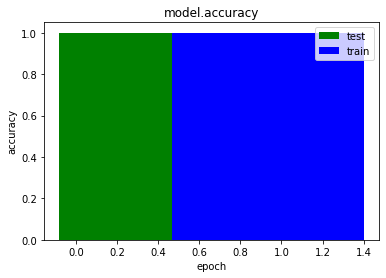

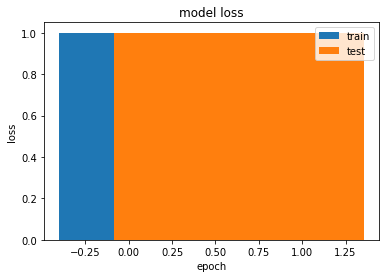

In [ ]:
import matplotlib.pyplot as plt
#summary for 
#plt.bar(history.history['accuracy'],height=0,width=0.25)
#plt.bar(history.history['val_accuracy'],height=0.5,width=0.25)
plt.bar(history.history['val_accuracy'],height=1,color='g')
plt.bar(history.history['accuracy'],height=1,color='b')
plt.title('model.accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test','train'],loc='upper right')

plt.show()

plt.bar(history.history['loss'],height=1)
plt.bar(history.history['val_accuracy'],height=1)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

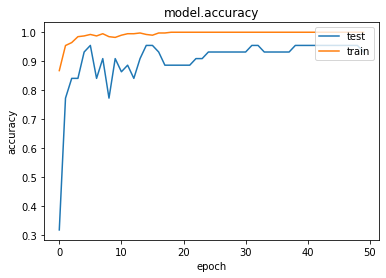

"\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_accuracy'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train','test'],loc='upper right')\nplt.show()"

In [ ]:
import matplotlib.pyplot as plt
#summary for 
#plt.bar(history.history['accuracy'],height=0,width=0.25)
#plt.bar(history.history['val_accuracy'],height=0.5,width=0.25)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model.accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['test','train'],loc='upper right')

plt.show()
'''
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()'''

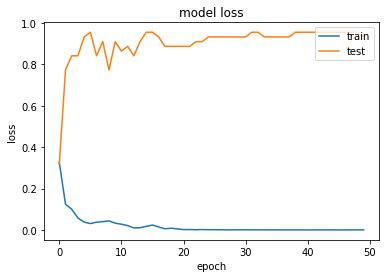

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
from keras.models import load_model
model=load_model(filename)
predictions=model.predict_generator(X_test,steps=188//16,verbose=1)

11/11 [==============================] - 0s 6ms/step


In [ ]:
y_pred=np.argmax(predictions,axis=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))
print("-"*70)
print(classification_report(y_test,y_pred))

[[150   0]
 [ 38   0]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       150
           1       0.00      0.00      0.00        38

    accuracy                           0.80       188
   macro avg       0.40      0.50      0.44       188
weighted avg       0.64      0.80      0.71       188



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
